In [3]:
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.rcsetup as mrc

In [4]:
brfss = pd.read_csv("BRFSS_Clean_Combo.csv")

In [5]:
brfss.head()

,Unnamed: 0,Unnamed: 1,ID,YEAR,_LLCPWT2,IMONTH,B_ASTHMA,B_CANCER,B_CHCCOPD,B_ADDEPEV,...,L_AGEG5YR,L_SEX,L_IMPRACE,L_RACE,L_EMPLOY1,L_MARITAL,L_INCOMG,L_EDUCAG,L_BMI5CAT,L_IMONTH
0,LLCP2017.csv,0,20170,2017,185.477444,1,0,0,0,0,...,70-74,Female,White,White,Retired,Widowed,$35K - $50K,College Grad,25 - 30,January
1,LLCP2017.csv,1,20171,2017,185.477444,1,0,0,0,0,...,65-69,Male,White,White,Retired,Married,$50K+,College Grad,25 - 30,January
2,LLCP2017.csv,2,20172,2017,370.954888,1,0,0,0,0,...,70-74,Male,White,White,Retired,Married,,< HS,25 - 30,January
3,LLCP2017.csv,3,20173,2017,185.477444,2,0,0,1,1,...,70-74,Female,White,White,Retired,Widowed,<$15K,< HS,25 - 30,February
4,LLCP2017.csv,4,20174,2017,252.493865,1,1,0,1,0,...,65-69,Female,White,White,Unable,Widowed,<$15K,< HS,18.5 - 25,January


In [6]:
brfss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305720 entries, 0 to 1305719
Data columns (total 52 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1305720 non-null  object 
 1   Unnamed: 1  1305720 non-null  int64  
 2   ID          1305720 non-null  int64  
 3   YEAR        1305720 non-null  int64  
 4   _LLCPWT2    1305720 non-null  float64
 5   IMONTH      1305720 non-null  int64  
 6   B_ASTHMA    1305720 non-null  int64  
 7   B_CANCER    1305720 non-null  int64  
 8   B_CHCCOPD   1305720 non-null  int64  
 9   B_ADDEPEV   1305720 non-null  int64  
 10  B_DIABETE   1305720 non-null  int64  
 11  B_HEART     1305720 non-null  int64  
 12  COMORB_1    1305720 non-null  int64  
 13  TOTCHRONIC  1305720 non-null  int64  
 14  CHRONICGRP  1305720 non-null  int64  
 15  _STATE      1305720 non-null  int64  
 16  _AGEG5YR    1305720 non-null  int64  
 17  SEX         1304323 non-null  float64
 18  _IMPRACE    1305720 no

In [7]:
pd.crosstab(brfss["CHRONICGRP"], brfss["TOTCHRONIC"])

TOTCHRONIC,0,1,2,3,4,5,6
CHRONICGRP,,,,,,,
0,734870,0,0,0,0,0,0
1,0,374149,0,0,0,0,0
2,0,0,135267,0,0,0,0
3,0,0,0,45099,13236,2742,357


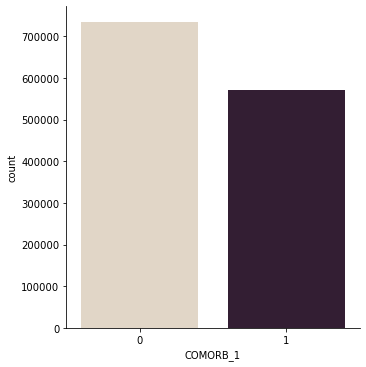

In [13]:
sb.catplot(x="COMORB_1", kind="count", palette="ch:.25", data=brfss)

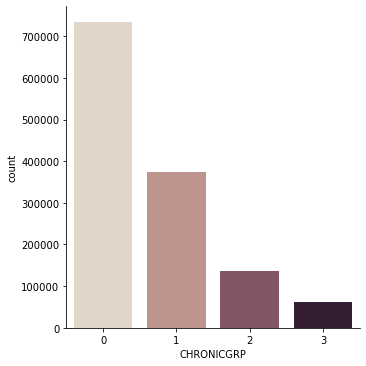

In [14]:
sb.catplot(x="CHRONICGRP", kind="count", palette="ch:.25", data=brfss)

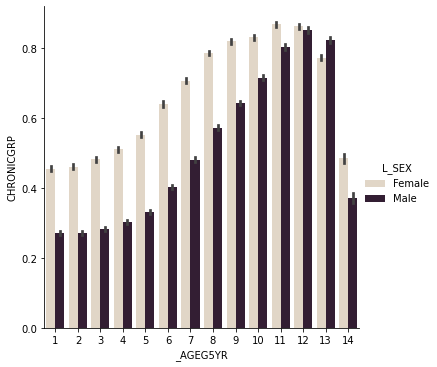

In [21]:
sb.catplot(x="_AGEG5YR", y="CHRONICGRP", hue="L_SEX", kind="bar", palette="ch:.25", data=brfss)

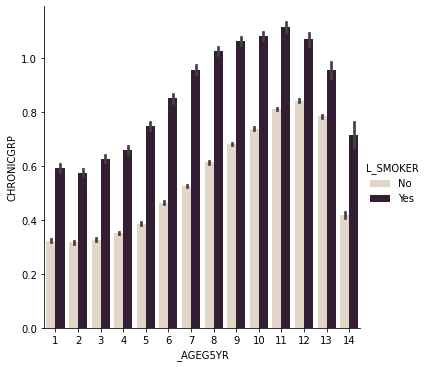

In [22]:
sb.catplot(x="_AGEG5YR", y="CHRONICGRP", hue="L_SMOKER", kind="bar", palette="ch:.25", data=brfss)

<AxesSubplot:xlabel='CHRONICGRP', ylabel='Proportion'>

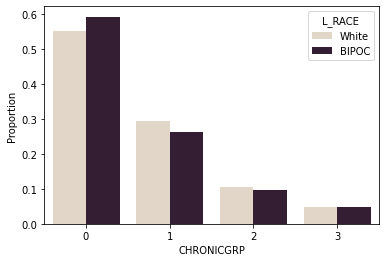

In [30]:
# Note this looks good / elegant, but takes an impossibly long time:
# sb.barplot(x='_IMPRACE', y='CHRONICGRP', data=brfss, estimator=lambda x: sum(x==0)*100.0/len(x))

# This doesn't look as good, but it only takes 1 second to run. :)
x, y, hue = "CHRONICGRP", "Proportion", "L_RACE"
hue_order = ["White", "BIPOC"]
(brfss[x]
 .groupby(brfss[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, palette="ch:.25", hue=hue, hue_order=hue_order))

<AxesSubplot:xlabel='_INCOMG', ylabel='Proportion'>

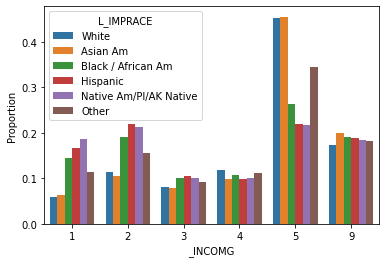

In [137]:
# INCOME GROUPS: 1 <$15K, 2 $15K-$25K, 3 $25K-$35K, 4 $35K-$50K, 5 $50K 9 REFUSED / BLANK
x, y, hue = "_INCOMG", "Proportion", "L_IMPRACE"
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
(brfss[x]
 .groupby(brfss[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sb.barplot, "data"), x=x, y=y, hue=hue, hue_order=hue_order))

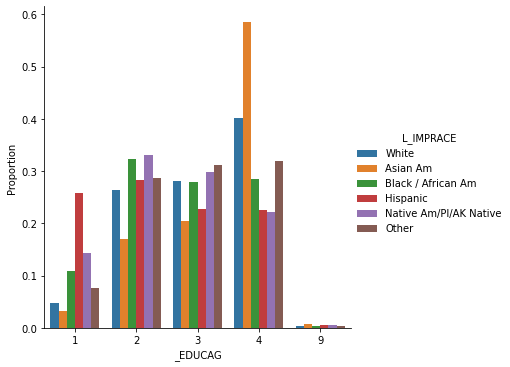

In [135]:
# _Educag 1 < HS, 2 HS GRAD, 3 SOME COLLEGE, 4 COLLEGE GRAD, 9 REFUSED / BLANK
x, y, hue = "_EDUCAG", "Proportion", "L_IMPRACE"
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
sd = brfss["_EDUCAG"].groupby(brfss["L_IMPRACE"]).value_counts(normalize=True).rename(y).reset_index()
sb.catplot(x="_EDUCAG", y="Proportion", hue="L_IMPRACE", hue_order=hue_order, kind="bar", data=sd)

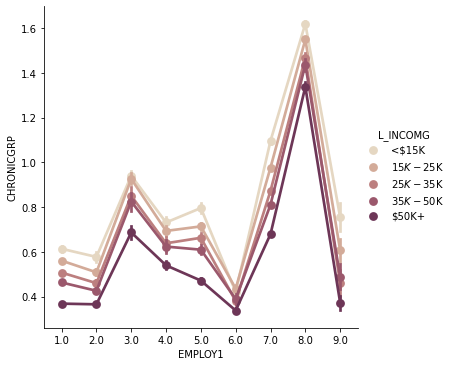

In [39]:
# Employ1: 1 Employed, 2 Self-Employed, 3 OOW 1+ yrs, 4 OOW <1 yr, 5 Homemaker, 6 Student, 
# 7 Retired, 8 Unable, _ Refused or Blank
hue_order = ["<$15K", "$15K - $25K", "$25K - $35K", "$35K - $50K", "$50K+", ""]
sb.catplot(x="EMPLOY1", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

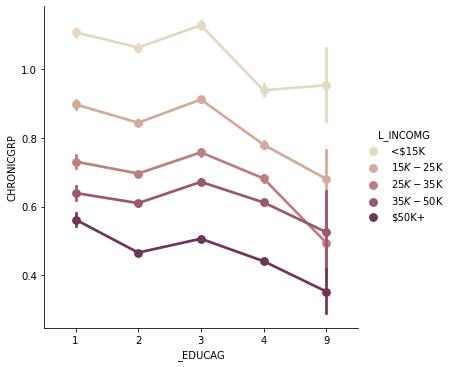

In [41]:
# People in technical jobs have more stress? 
# _Educag 1 < HS, 2 HS GRAD, 3 SOME COLLEGE, 4 COLLEGE GRAD, 9 REFUSED / BLANK
hue_order = ["<$15K", "$15K - $25K", "$25K - $35K", "$35K - $50K", "$50K+", ""]
sb.catplot(x="_EDUCAG", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

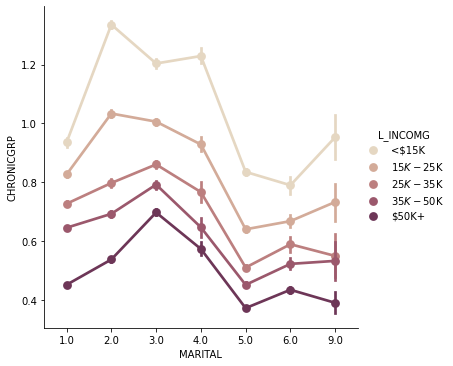

In [42]:
# MARITAL 1 Married 2 Divorced 3 Widowed 4 Separated 5 Never Married 6 Unmarried Couple 9 Refused / Blank
hue_order = ["<$15K", "$15K - $25K", "$25K - $35K", "$35K - $50K", "$50K+", ""]
sb.catplot(x="MARITAL", y="CHRONICGRP", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", palette="ch:.25", data=brfss)

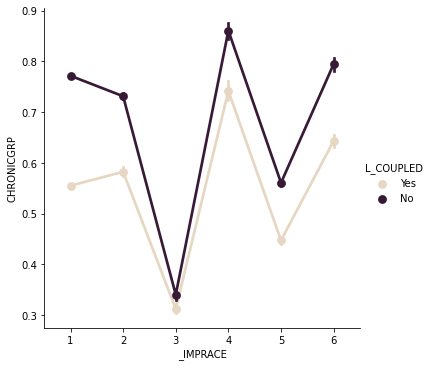

In [44]:
# Coupled is a computed variable where yes = Married or Unmarried couple, and no = everything else
# _IMPRACE - 1 White 2 Black 3 Asian 4 Native / PI 5 Hispanic 6 Other
hue_order = ["Yes", "No"]
sb.catplot(x="_IMPRACE", y="CHRONICGRP", hue="L_COUPLED", hue_order=hue_order,
           kind="point", palette="ch:.25", data=brfss)

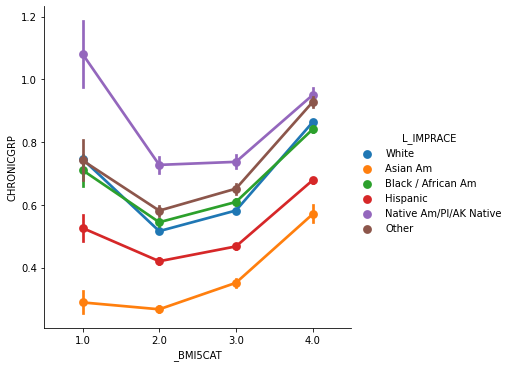

In [79]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["White", "Asian Am", "Black / African Am", "Hispanic", "Native Am/PI/AK Native", "Other"]
sb.catplot(x="_BMI5CAT", y="CHRONICGRP", hue="L_IMPRACE", hue_order=hue_order,
           kind="point", data=brfss)

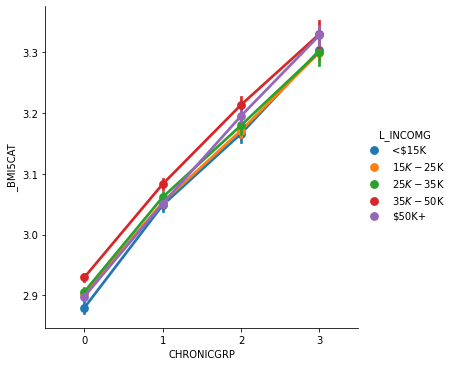

In [141]:
# No differences - BMI is a VERY STRONG predictor of chronic conditions
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["<$15K", "$15K - $25K", "$25K - $35K", "$35K - $50K", "$50K+", ""]
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_INCOMG", hue_order=hue_order, 
           kind="point", data=brfss)

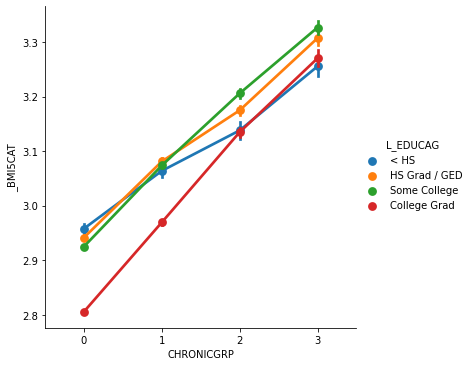

In [138]:
# Basically no difference 
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
hue_order = ["< HS", "HS Grad / GED", "Some College", "College Grad", ""]
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_EDUCAG", hue_order=hue_order, 
           kind="point", data=brfss)

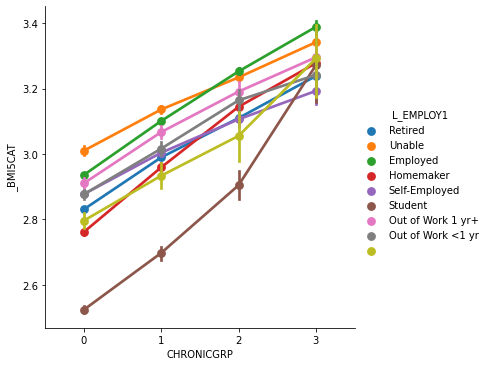

In [139]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_EMPLOY1", 
           kind="point", data=brfss)

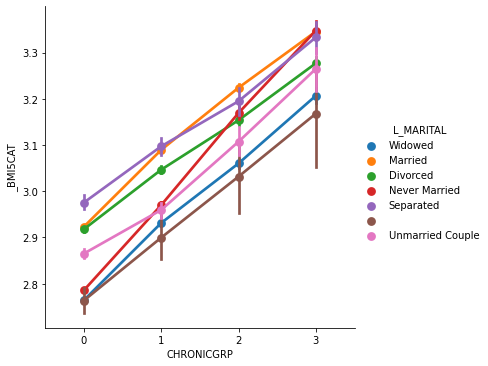

In [140]:
# BMI Groups 1: < 18.5 (Underweight), 2: 18.5 - 25 (Normal), 3: 25 - 30 (Overweight), 4: 30+ (Obese)
sb.catplot(x="CHRONICGRP", y="_BMI5CAT", hue="L_MARITAL", 
           kind="point", data=brfss)

In [61]:
# Removed weighting
map_df_dup = brfss.copy()
map_df_dup['_LLCPWT2'] = 1
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["TOTCHRONIC"] * dfx["_LLCPWT2"]).sum() / dfx["_LLCPWT2"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'TotalComorb'})
mapme

,StateName,StateAbbr,Year,TotalComorb
0,Alabama,AL,2017,0.809890
1,Alabama,AL,2018,0.817287
2,Alabama,AL,2019,0.787720
3,Alaska,AK,2017,0.528567
4,Alaska,AK,2018,0.582306
...,...,...,...,...
153,Wisconsin,WI,2018,0.584067
154,Wisconsin,WI,2019,0.596647
155,Wyoming,WY,2017,0.627829
156,Wyoming,WY,2018,0.597266


In [63]:
# Thank you to Rachel for this code. :)
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "TotalComorb",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of Comorbidities in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [144]:
# Removed weighting - Let's look at BMI, how similar are they?
map_df_dup = brfss.copy()
map_df_dup['_LLCPWT2'] = 1
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_BMI5CAT"] * dfx["_LLCPWT2"]).sum() / dfx["_LLCPWT2"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'BMI_Prop'})
#mapme

In [143]:
# For Comparison - BMI Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "BMI_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of BMI in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

In [145]:
# INCOMEG
map_df_dup = brfss.copy()
map_df_dup['_LLCPWT2'] = 1
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_INCOMG"] * dfx["_LLCPWT2"]).sum() / dfx["_LLCPWT2"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'INCOME_Prop'})
#mapme

In [146]:
# For Comparison - INCOME Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "INCOME_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of INCOME in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show() 

In [147]:
# EDUCAG
map_df_dup = brfss.copy()
map_df_dup['_LLCPWT2'] = 1
mapme = map_df_dup.groupby(['L_STATENM','L_STATEAB','YEAR']).apply(lambda dfx: (dfx["_EDUCAG"] * dfx["_LLCPWT2"]).sum() / dfx["_LLCPWT2"].sum()).reset_index()
mapme = mapme.rename(columns = {'L_STATENM':'StateName', 'L_STATEAB':'StateAbbr', 'YEAR':'Year', 0:'EDUC_Prop'})
#mapme

In [148]:
# For Comparison - EDUC Map
# NOTE: New Jersey only has data for 2 out of the 3 years - 2017 & 2018
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(mapme,  # Input Pandas DataFrame
                    locations = "StateAbbr",  # DataFrame column with locations
                    color = "EDUC_Prop",  # DataFrame column with color values
                    color_continuous_scale = 'turbo',
                    hover_name = "StateName", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Average Proportion of EDUCATION in the US by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()